In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
iris_dataset = load_iris()
iris_dataset.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df_iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = iris_dataset.target
df_iris['class'] = iris_dataset.target_names[iris_dataset.target]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
y= df_iris['class']
x =df_iris.drop(columns=["target","class"])


In [6]:
feature_names = x.columns
labels = y.unique()


In [7]:

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.33)

In [8]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [9]:
test_pred_decision_tree = clf.predict(test_x)
trees =metrics.accuracy_score(test_lab, test_pred_decision_tree)
print("Accuracy:",trees)

Accuracy: 0.94


Text(20.5, 0.5, 'True Label')

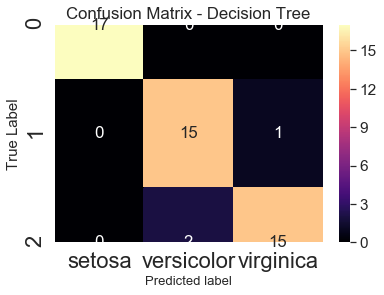

<Figure size 720x504 with 0 Axes>

In [15]:


confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.4)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =13)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)

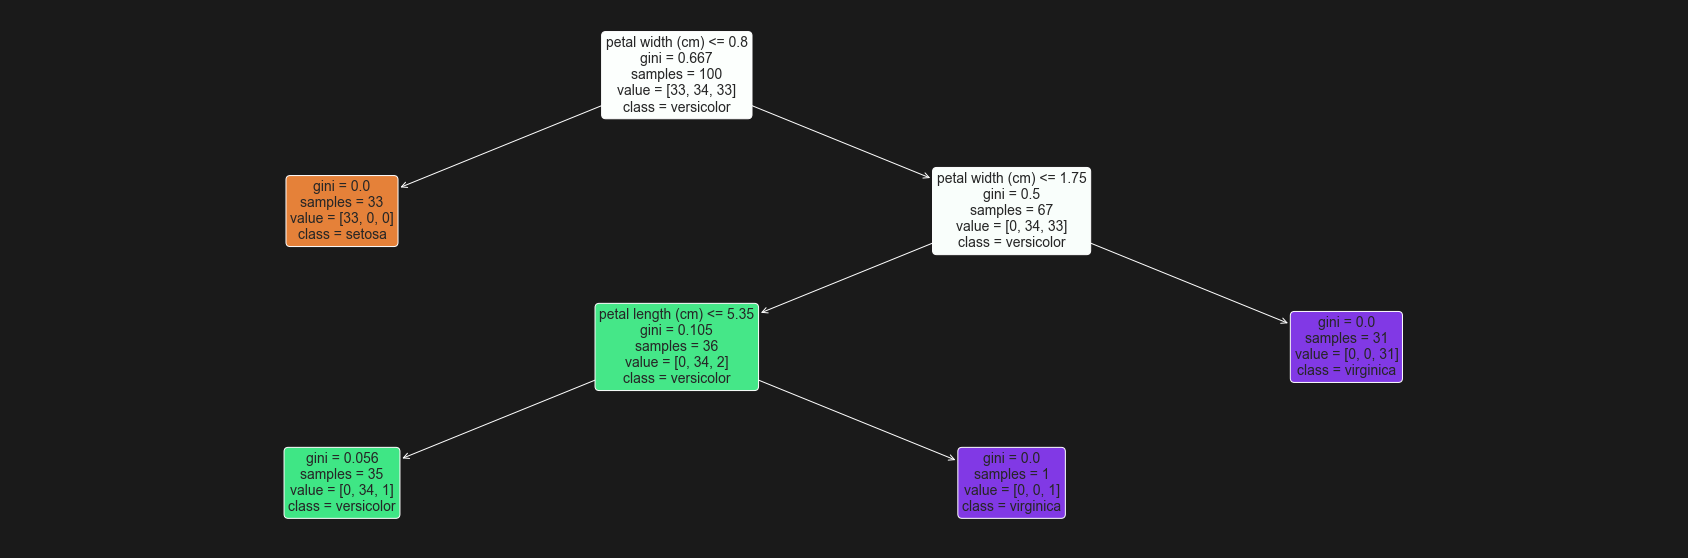

In [11]:

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,feature_names = feature_names,class_names = labels,rounded = True,filled = True,fontsize=14)
plt.show()